In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
df=pd.read_csv('carprices.csv')
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [93]:
df.shape

(13, 4)

In [94]:
df['Car Model'].value_counts()

BMW X5                   5
Audi A5                  4
Mercedez Benz C class    4
Name: Car Model, dtype: int64

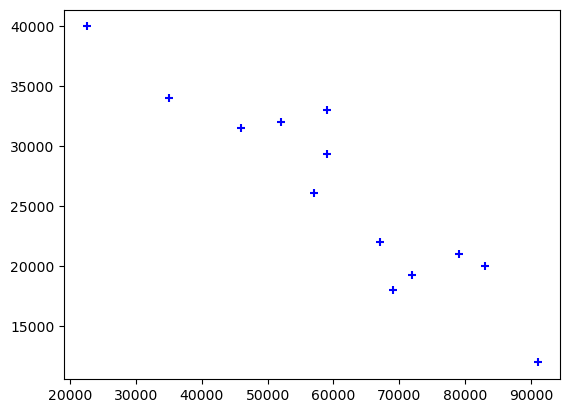

In [95]:
# scatter plot to check if we can apply Linear Regression
plt.scatter(df['Mileage'],df['Sell Price($)'],marker='+',color='blue')

In [96]:
# need to convert 'Car Model' into dummy variable (as the 'Car Model' column has nomial categorical value)
dummies=pd.get_dummies(df['Car Model'])

In [97]:
merged=pd.concat([df,dummies],axis=1)

In [98]:
merged.head()

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0


In [99]:
# remove 'Car Model' column and any one dummy variable column
final_df=merged.drop(['Car Model','Audi A5'],axis=1)

In [100]:
final_df.head()

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0


In [101]:
# Create Linear Regression Model
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [102]:
X=final_df.drop(['Sell Price($)'],axis=1)
y=final_df['Sell Price($)']

In [103]:
model.fit(X,y)

LinearRegression()

In [104]:
X

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [105]:
# Predict Price of mercedez benz that is 4 yr old with mileage 45000
model.predict([[45000,4,0,1]])

C:\Users\soumi\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [106]:
# Price of Audi A5 that is 7 yr old with mileage 86000
model.predict([[86000,7,0,0]])

C:\Users\soumi\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15365.40972059])

In [107]:
# find the accuracy of the model
model.score(X,y)

0.9417050937281082

# Apply One hot encoding

In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
le=LabelEncoder()

In [110]:
dfle=df
dfle['Car Model']=le.fit_transform(df['Car Model']) # convert the column into labels

In [111]:
dfle

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [112]:
X=dfle[['Car Model','Mileage','Age(yrs)']].values # Values is to get a 2D array, not a dataframe
y=dfle['Sell Price($)'] 

In [113]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [114]:
ct=ColumnTransformer( [('one_hot_encoder', OneHotEncoder(categories='auto'), [0])],   # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'   ) # ColumnTransformer is used to specify thecolumn index of categorical feature

In [115]:
X=ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [116]:
model.fit(X,y)

LinearRegression()

In [117]:
# ohe=OneHotEncoder(categories=[0]) # 0th column has cateorical feature
# ohe.fit_transform(X).toarray()

In [118]:
# Predict Price of mercedez benz that is 4 yr old with mileage 45000
model.predict([[0,0,1,45000,4]]) # 1st col='mercedez benz',2nd col='BMW X5',3rd co='Audi A5'

array([36991.31721061])

In [119]:
# Price of Audi A5 that is 7 yr old with mileage 86000
model.predict([[1,0,0,86000,7]])

array([15365.4097206])

In [120]:
model.score(X,y)

0.9417050937281083

In [121]:
# Compare the results with dummy variable results